In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

#### 1.张量展示

In [ ]:
a=tf.constant([1,2],name="a")
b=tf.constant([1,2],name="b")
result=a+b

print(result)

#### 2.sigmoid函数

Sigmoid Function Input :: [-10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7
   8   9]
Sigmoid Function Output :: [0.50001135 0.50003085 0.50008384 0.50022776 0.50061816 0.50167321
 0.50449643 0.51185425 0.52976549 0.56683301 0.62245933 0.67503753
 0.70698737 0.72163256 0.72750761 0.72974065 0.73057215 0.73087942
 0.73099264 0.73103432]


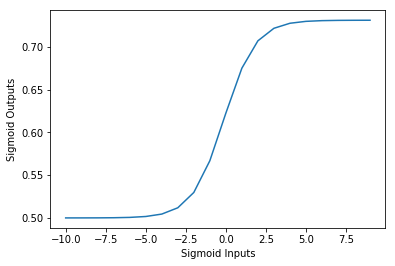

In [4]:
def sigmoid(x):
    return 1.0/(1+np.exp(-x))

sigmoid_inputs = np.arange(-10,10)
sigmoid_outputs=sigmoid(sigmoid(sigmoid_inputs))
print("Sigmoid Function Input :: {}".format(sigmoid_inputs))
print("Sigmoid Function Output :: {}".format(sigmoid_outputs))

plt.plot(sigmoid_inputs,sigmoid_outputs)
plt.xlabel("Sigmoid Inputs")
plt.ylabel("Sigmoid Outputs")
plt.show()

#### 3.softmax函数图像

Sigmoid Function Input :: [-19 -18 -17 -16 -15 -14 -13 -12 -11 -10  -9  -8  -7  -6  -5  -4  -3  -2
  -1   0]
Sigmoid Function Output :: [3.54164282e-09 9.62718333e-09 2.61693975e-08 7.11357977e-08
 1.93367146e-07 5.25626400e-07 1.42880069e-06 3.88388295e-06
 1.05574885e-05 2.86982290e-05 7.80098745e-05 2.12052824e-04
 5.76419339e-04 1.56687021e-03 4.25919483e-03 1.15776919e-02
 3.14714295e-02 8.55482150e-02 2.32544158e-01 6.32120560e-01]


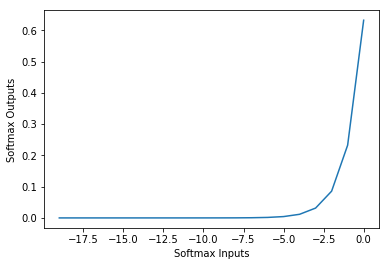

In [5]:
def softmax(x):
    orig_shape=x.shape
    if len(x.shape)>1:
        #Matrix
        #shift max whithin each row
        constant_shift=np.max(x,axis=1).reshape(1,-1)
        x-=constant_shift
        x=np.exp(x)
        normlize=np.sum(x,axis=1).reshape(1,-1)
        x/=normlize
    else:
        #vector
        constant_shift=np.max(x)
        x-=constant_shift
        x=np.exp(x)
        normlize=np.sum(x)
        x/=normlize
    assert x.shape==orig_shape
    return x

softmax_inputs = np.arange(-10,10)
softmax_outputs=softmax(softmax_inputs)
print("Sigmoid Function Input :: {}".format(softmax_inputs))
print("Sigmoid Function Output :: {}".format(softmax_outputs))
# 画图像
plt.plot(softmax_inputs,softmax_outputs)
plt.xlabel("Softmax Inputs")
plt.ylabel("Softmax Outputs")
plt.show()

#### 4.ReLU函数展示

Sigmoid Function Input :: [-15.         -14.3877551  -13.7755102  -13.16326531 -12.55102041
 -11.93877551 -11.32653061 -10.71428571 -10.10204082  -9.48979592
  -8.87755102  -8.26530612  -7.65306122  -7.04081633  -6.42857143
  -5.81632653  -5.20408163  -4.59183673  -3.97959184  -3.36734694
  -2.75510204  -2.14285714  -1.53061224  -0.91836735  -0.30612245
   0.30612245   0.91836735   1.53061224   2.14285714   2.75510204
   3.36734694   3.97959184   4.59183673   5.20408163   5.81632653
   6.42857143   7.04081633   7.65306122   8.26530612   8.87755102
   9.48979592  10.10204082  10.71428571  11.32653061  11.93877551
  12.55102041  13.16326531  13.7755102   14.3877551   15.        ]
Sigmoid Function Output :: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.30612245  

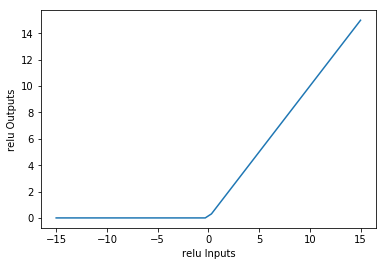

In [6]:
#relu函数图像
def relu(x):
    y=x.copy()
    y[y<0]=0
    return y

relu_input=np.linspace(-15,15)
relu_output=relu(relu_input)

print("Sigmoid Function Input :: {}".format(relu_input))
print("Sigmoid Function Output :: {}".format(relu_output))

plt.plot(relu_input,relu_output)
plt.xlabel("relu Inputs")
plt.ylabel("relu Outputs")
plt.show()

#### 5.sigmoid导数

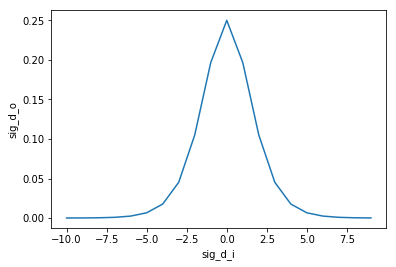

In [6]:
def sig_d(x):
    return sigmoid(x)*(1-sigmoid(x))

sig_d_i=np.arange(-10,10)
sig_d_o=sig_d(sig_d_i)


plt.plot(sig_d_i,sig_d_o)
plt.xlabel("sig_d_i")
plt.ylabel("sig_d_o")
plt.show()


#### 6.梯度下降介绍

In [ ]:
def f(x):
  return x**2 - 2*x

def df(x):
  return 2*x - 2

def gd(start_x, step_x, iter_cnt, df):
    """
    Args:
        start_x  起点
        step_x   迭代步长，也称为learing rate
        iter_cnt 迭代次数
        df       函数f(x)的导数
    """
    x = start_x
    for i in range(iter_cnt):
        g = df(x)
        x -= g * step_x
        print('[%2d] x=%f df(x)=%f f(%f)=%f' %(i, x, g, x, f(x)))
        if abs(g) < 1e-6:
            break;
    return x

# 从x=5起步，每次往前走0.05，迭代100次，前面定义的df当做导数函数传入
gd(5, 0.05, 100, df)


#### 7.tensorboard展示

In [8]:
import tensorflow as tf

# 定义一个简单的计算图，实现向量加法的操作。
input1 = tf.constant([1.0, 2.0, 3.0], name = 'input1')
input2 = tf.Variable(tf.random_uniform([3]), name = 'input2')
output = input1+input2

writer = tf.summary.FileWriter("initlog", tf.get_default_graph())
writer.close()
